In [156]:
import pandas as pd
import numpy as np

In [157]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
submission_df=pd.read_csv("sample_submission.csv")

In [158]:
train_df.head(10)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
6,6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
8,8,Male,17.000000,1.700000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,3.000000,yes,1.000000,1.000000,no,Public_Transportation,Overweight_Level_I
9,9,Female,26.000000,1.638836,111.275646,yes,yes,3.000000,3.000000,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III


In [159]:
train_df.shape

(20758, 18)

In [160]:
test_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [161]:
submission_df.head()

,id,NObeyesdad
0,20758,Normal_Weight
1,20759,Normal_Weight
2,20760,Normal_Weight
3,20761,Normal_Weight
4,20762,Normal_Weight


In [162]:
test_df.shape

(13840, 17)

In [163]:
train_df.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [164]:
train_df.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [165]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [166]:
col=train_df.columns

In [167]:
for i in col:
    print(i,train_df[i].unique())
    print("--------------------------")

id [    0     1     2 ... 20755 20756 20757]
--------------------------
Gender ['Male' 'Female']
--------------------------
Age [24.443011 18.       20.952737 ... 25.746113 38.08886  33.852953]
--------------------------
Height [1.699998 1.56     1.71146  ... 1.791366 1.672594 1.536819]
--------------------------
Weight [ 81.66995   57.        50.165754 ... 152.063947  79.5       80.615325]
--------------------------
family_history_with_overweight ['yes' 'no']
--------------------------
FAVC ['yes' 'no']
--------------------------
FCVC [2.         1.880534   3.         2.679664   2.919751   1.99124
 1.397468   2.636719   1.         1.392665   2.203962   2.971588
 2.668949   1.98989905 2.417635   2.219186   2.919526   2.263245
 2.649406   1.754401   2.303656   2.020785   2.068834   2.689929
 2.979383   2.225731   2.843456   2.312528   2.962415   2.945967
 2.108638   1.826885   2.200588   2.598051   2.984425   1.387489
 2.76533    2.941627   2.490776   2.801514   2.336044   1.270448
 2.9

In [168]:
train_df.drop("id",axis=1,inplace=True)

In [169]:
train_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [172]:
#SCC SCC huge imbalance
# CALC CALC imbalance

In [173]:
train_df.columns
train_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [174]:
columns=['CAEC','CALC','MTRANS']
for i in columns :
    # Define your categories
    categories = train_df[i].unique()
    # Create a LabelEncoder object
    label_encoder = LabelEncoder()

# Fit label encoder and return encoded labels
    encoded_labels = label_encoder.fit_transform(categories)

# Print the encoded labels
    print(i,categories,"------->",encoded_labels)

CAEC ['Sometimes' 'Frequently' 'no' 'Always'] -------> [2 1 3 0]
CALC ['Sometimes' 'no' 'Frequently'] -------> [1 2 0]
MTRANS ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike'] -------> [3 0 4 2 1]


In [258]:
from sklearn.preprocessing import OrdinalEncoder

# Define ordinal mappings for each column
ordinal_mappings = {
    'CAEC': {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3},
    'CALC': {'no': 0, 'Sometimes': 1, 'Frequently': 2,'Always': 3},
    'MTRANS': {'Walking': 0, 'Bike': 1, 'Motorbike': 2, 'Public_Transportation': 3, 'Automobile': 4}
}

# Create OrdinalEncoder object
ordinal_encoder = OrdinalEncoder(categories=[sorted(mapping.keys()) for mapping in ordinal_mappings.values()])

# Apply ordinal encoding to the specified columns
train_df[['CAEC_encoded', 'CALC_encoded', 'MTRANS_encoded']] = ordinal_encoder.fit_transform(train_df[['CAEC', 'CALC', 'MTRANS']])

# Print the DataFrame with encoded values


In [259]:
train_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,MTRANS,NObeyesdad,CAEC_encoded,CALC_encoded,MTRANS_encoded,Gender_encoded,family_history_with_overweight_encoded,FAVC_encoded,SMOKE_encoded,SCC_encoded
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,...,Public_Transportation,Overweight_Level_II,2.0,2.0,3.0,1,1,1,0,0
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,...,Automobile,Normal_Weight,1.0,3.0,0.0,0,1,1,0,0
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,...,Public_Transportation,Insufficient_Weight,2.0,3.0,3.0,0,1,1,0,0
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,...,Public_Transportation,Obesity_Type_III,2.0,2.0,3.0,0,1,1,0,0
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,...,Public_Transportation,Overweight_Level_II,2.0,2.0,3.0,1,1,1,0,0


#### Encoding Gender column

In [260]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply label encoder to the column
train_df['Gender_encoded'] = label_encoder.fit_transform(train_df['Gender'])



In [261]:
train_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,MTRANS,NObeyesdad,CAEC_encoded,CALC_encoded,MTRANS_encoded,Gender_encoded,family_history_with_overweight_encoded,FAVC_encoded,SMOKE_encoded,SCC_encoded
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,...,Public_Transportation,Overweight_Level_II,2.0,2.0,3.0,1,1,1,0,0
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,...,Automobile,Normal_Weight,1.0,3.0,0.0,0,1,1,0,0
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,...,Public_Transportation,Insufficient_Weight,2.0,3.0,3.0,0,1,1,0,0
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,...,Public_Transportation,Obesity_Type_III,2.0,2.0,3.0,0,1,1,0,0
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,...,Public_Transportation,Overweight_Level_II,2.0,2.0,3.0,1,1,1,0,0


### Encodimg family_history_with_overweight column

In [262]:
train_df['family_history_with_overweight_encoded'] = label_encoder.fit_transform(train_df['family_history_with_overweight'])
train_df['FAVC_encoded'] = label_encoder.fit_transform(train_df['FAVC'])

train_df['SMOKE_encoded'] = label_encoder.fit_transform(train_df['SMOKE'])

train_df['SCC_encoded'] = label_encoder.fit_transform(train_df['SCC'])

In [263]:
train_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,MTRANS,NObeyesdad,CAEC_encoded,CALC_encoded,MTRANS_encoded,Gender_encoded,family_history_with_overweight_encoded,FAVC_encoded,SMOKE_encoded,SCC_encoded
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,...,Public_Transportation,Overweight_Level_II,2.0,2.0,3.0,1,1,1,0,0
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,...,Automobile,Normal_Weight,1.0,3.0,0.0,0,1,1,0,0
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,...,Public_Transportation,Insufficient_Weight,2.0,3.0,3.0,0,1,1,0,0
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,...,Public_Transportation,Obesity_Type_III,2.0,2.0,3.0,0,1,1,0,0
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,...,Public_Transportation,Overweight_Level_II,2.0,2.0,3.0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,...,Public_Transportation,Obesity_Type_II,2.0,2.0,3.0,1,1,1,0,0
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,...,Public_Transportation,Insufficient_Weight,1.0,2.0,3.0,1,0,1,0,0
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,...,Public_Transportation,Obesity_Type_II,2.0,3.0,3.0,1,1,1,0,0
20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,...,Automobile,Overweight_Level_II,2.0,3.0,0.0,1,1,1,0,0


In [264]:

train_df_encoded=train_df.drop(columns=['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS'],axis=1)

In [265]:
train_df_encoded.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,CAEC_encoded,CALC_encoded,MTRANS_encoded,Gender_encoded,family_history_with_overweight_encoded,FAVC_encoded,SMOKE_encoded,SCC_encoded
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,Overweight_Level_II,2.0,2.0,3.0,1,1,1,0,0
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,Normal_Weight,1.0,3.0,0.0,0,1,1,0,0
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,Insufficient_Weight,2.0,3.0,3.0,0,1,1,0,0
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,Obesity_Type_III,2.0,2.0,3.0,0,1,1,0,0
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,Overweight_Level_II,2.0,2.0,3.0,1,1,1,0,0


In [266]:
# Assuming 'column_name' is the column you want to shift to the last position
column_name = 'NObeyesdad'
column_to_shift = train_df_encoded.pop(column_name)

train_df_encoded[column_name] = column_to_shift

train_df_encoded.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,CAEC_encoded,CALC_encoded,MTRANS_encoded,Gender_encoded,family_history_with_overweight_encoded,FAVC_encoded,SMOKE_encoded,SCC_encoded,NObeyesdad
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,2.0,2.0,3.0,1,1,1,0,0,Overweight_Level_II
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.0,3.0,0.0,0,1,1,0,0,Normal_Weight
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,2.0,3.0,3.0,0,1,1,0,0,Insufficient_Weight
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,2.0,2.0,3.0,0,1,1,0,0,Obesity_Type_III
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,2.0,2.0,3.0,1,1,1,0,0,Overweight_Level_II


In [267]:

# Specify columns to round to two decimal places
columns_to_round = ['Height','Weight','FCVC','NCP','CH2O','FAF','TUE']

# Round the selected columns to two decimal places
train_df_encoded[columns_to_round] = train_df_encoded[columns_to_round].round(2)


In [268]:
train_df_encoded['Age']= train_df_encoded['Age'].astype(int)

In [269]:
train_df_encoded.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,CAEC_encoded,CALC_encoded,MTRANS_encoded,Gender_encoded,family_history_with_overweight_encoded,FAVC_encoded,SMOKE_encoded,SCC_encoded,NObeyesdad
0,24,1.70,81.67,2.00,2.98,2.76,0.00,0.98,2.0,2.0,3.0,1,1,1,0,0,Overweight_Level_II
1,18,1.56,57.00,2.00,3.00,2.00,1.00,1.00,1.0,3.0,0.0,0,1,1,0,0,Normal_Weight
2,18,1.71,50.17,1.88,1.41,1.91,0.87,1.67,2.0,3.0,3.0,0,1,1,0,0,Insufficient_Weight
3,20,1.71,131.27,3.00,3.00,1.67,1.47,0.78,2.0,2.0,3.0,0,1,1,0,0,Obesity_Type_III
4,31,1.91,93.80,2.68,1.97,1.98,1.97,0.93,2.0,2.0,3.0,1,1,1,0,0,Overweight_Level_II


In [270]:
## Applying Label encoder on Target column

train_df_encoded['NObeyesdad'] = label_encoder.fit_transform(train_df_encoded['NObeyesdad'])

# Get the mapping of labels to original values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
print("Label mapping:")
for value, label in label_mapping.items():
    print(f"{value}: {label}")

Label mapping:
Insufficient_Weight: 0
Normal_Weight: 1
Obesity_Type_I: 2
Obesity_Type_II: 3
Obesity_Type_III: 4
Overweight_Level_I: 5
Overweight_Level_II: 6


In [271]:
Q1 = train_df_encoded['Height'].quantile(0.25)
Q3 = train_df_encoded['Height'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers based on the IQR
train_df_encoded = train_df_encoded[(train_df_encoded['Height'] >= lower_bound) & (train_df_encoded['Height'] <= upper_bound)]

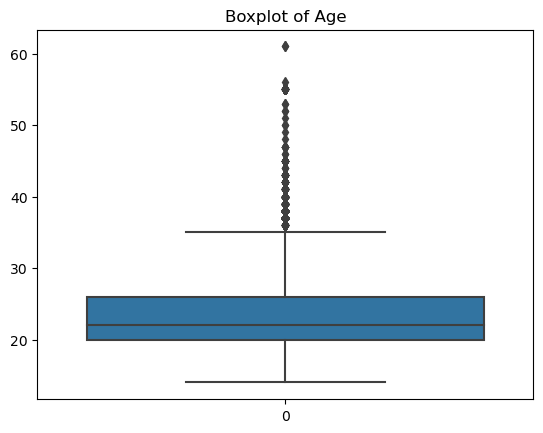

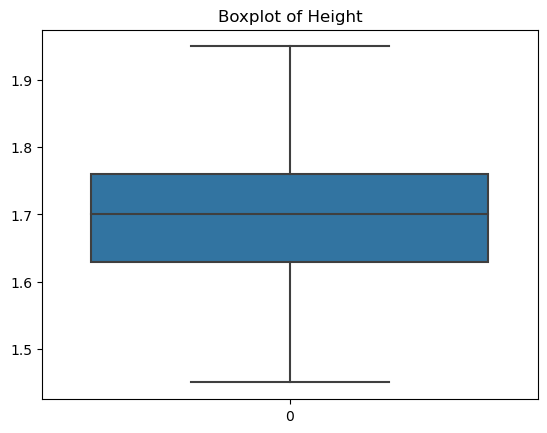

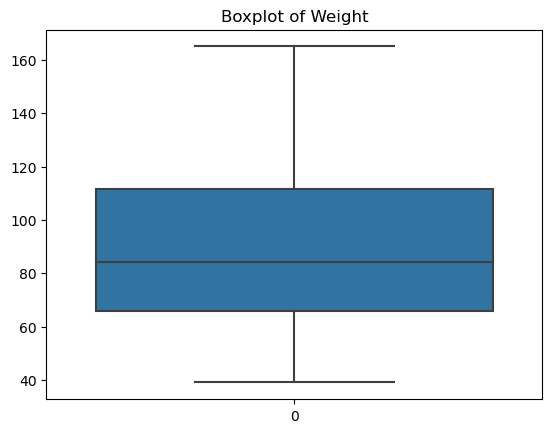

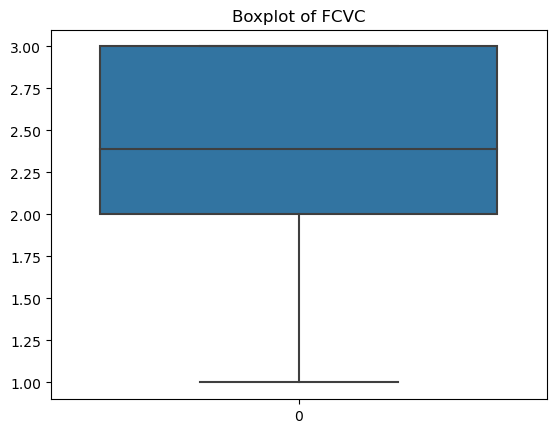

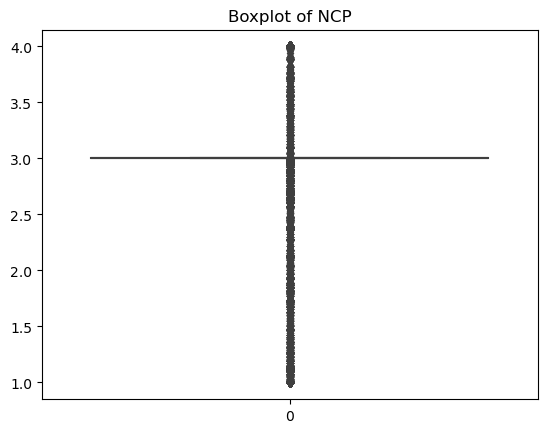

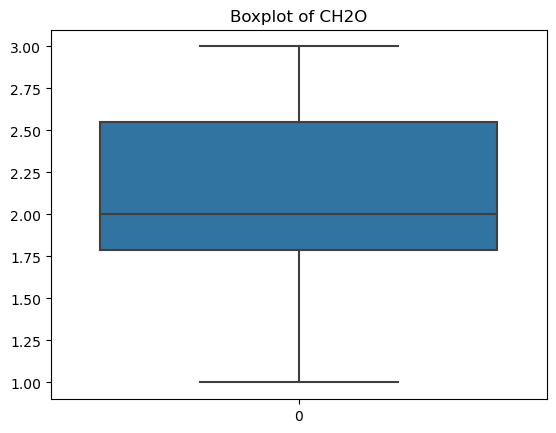

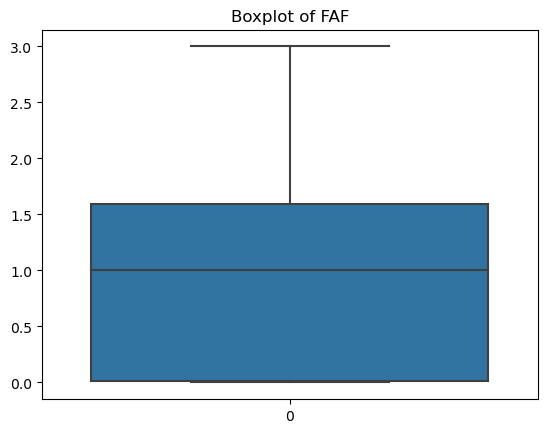

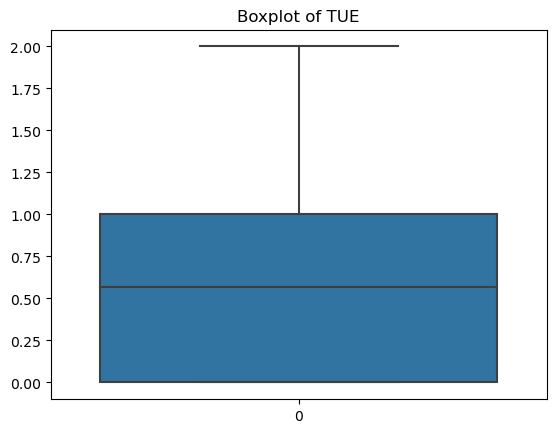

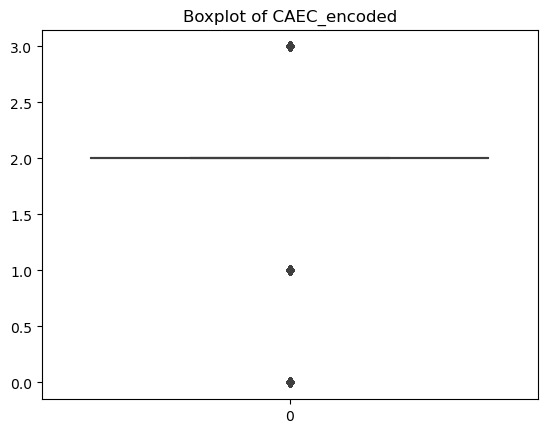

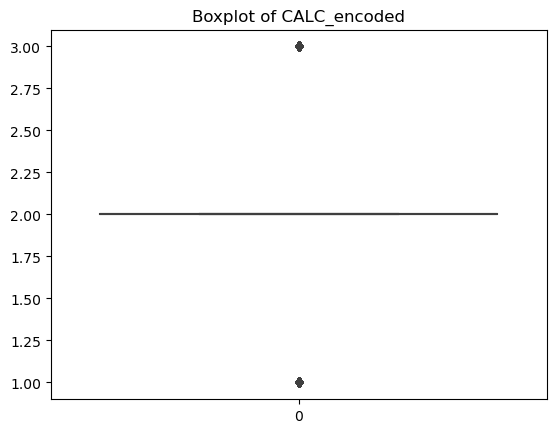

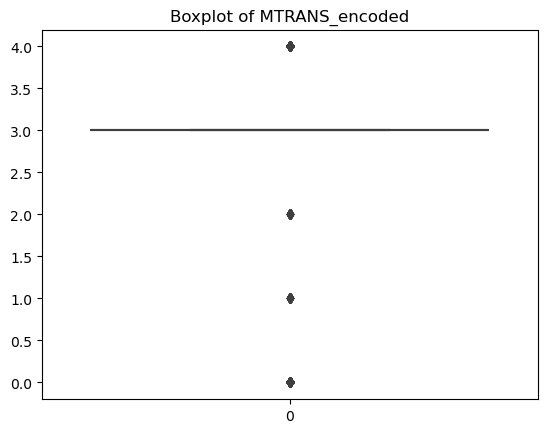

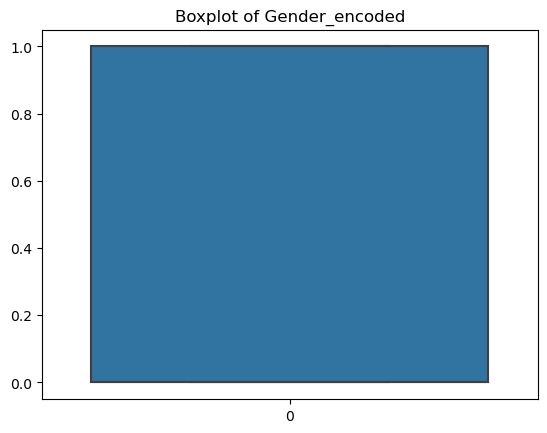

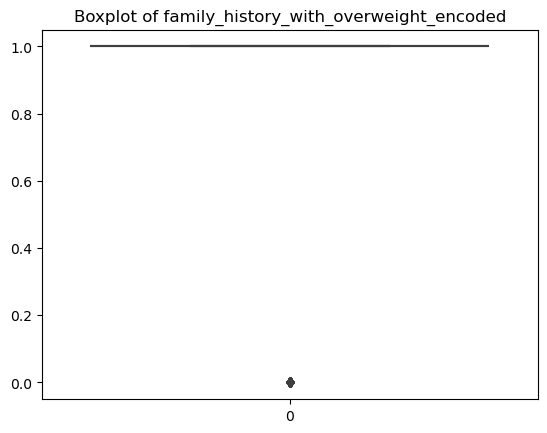

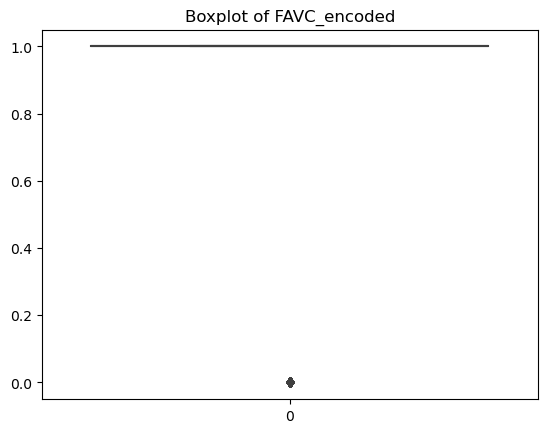

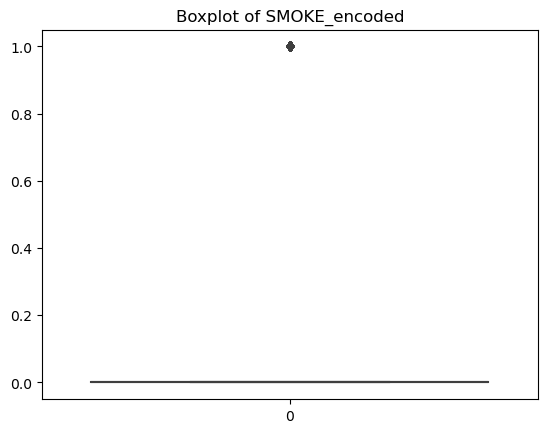

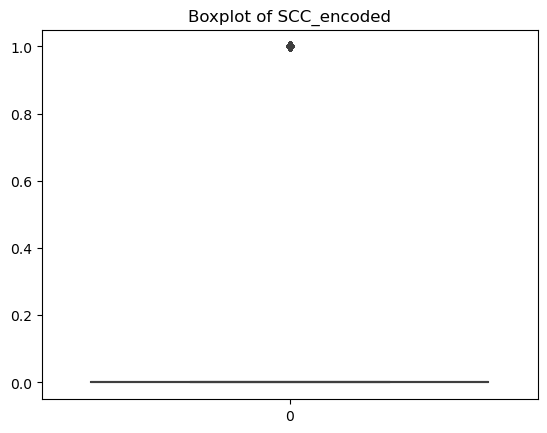

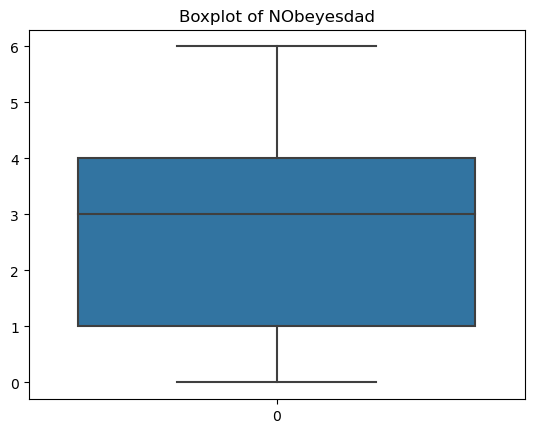

In [272]:
# Create a boxplot
import matplotlib.pyplot as plt
import seaborn as sns
for i in train_df_encoded.columns:
    sns.boxplot(data=train_df_encoded[i])
    plt.title('Boxplot of '+i)
    plt.show()

## Applying Feature Seelction without Normalisation 

In [273]:
test_df.head(10)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,...,CALC,MTRANS,CAEC_encoded,CALC_encoded,MTRANS_encoded,Gender_encoded,family_history_with_overweight_encoded,FAVC_encoded,SMOKE_encoded,SCC_encoded
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,...,Sometimes,Public_Transportation,2.0,2.0,3.0,1,1,1,0,0
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,...,Sometimes,Public_Transportation,2.0,2.0,3.0,0,1,1,0,0
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,...,Sometimes,Public_Transportation,2.0,2.0,3.0,0,1,1,0,0
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,...,Sometimes,Public_Transportation,2.0,2.0,3.0,1,1,1,0,0
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,...,Sometimes,Public_Transportation,2.0,2.0,3.0,0,1,1,0,0
5,20763,Male,19.799054,1.844751,59.605028,yes,yes,2.000000,4.000000,Sometimes,...,no,Automobile,2.0,3.0,0.0,1,1,1,0,0
6,20764,Male,18.000000,1.728834,51.442293,yes,yes,1.202075,3.000000,Sometimes,...,Sometimes,Public_Transportation,2.0,2.0,3.0,1,1,1,0,0
7,20765,Male,20.000000,1.810000,80.000000,yes,yes,2.000000,3.000000,Always,...,no,Automobile,0.0,3.0,0.0,1,1,1,0,0
8,20766,Male,21.000000,1.700000,80.000000,yes,yes,2.000000,3.000000,Frequently,...,no,Public_Transportation,1.0,3.0,3.0,1,1,1,1,0
9,20767,Female,21.000000,1.560000,53.000000,no,yes,2.000000,3.000000,Sometimes,...,Sometimes,Public_Transportation,2.0,2.0,3.0,0,0,1,0,0


In [274]:
columns=['CAEC','CALC','MTRANS']
for i in columns :
    # Define your categories
    categories = test_df[i].unique()
    # Create a LabelEncoder object
    label_encoder = LabelEncoder()

# Fit label encoder and return encoded labels
    encoded_labels = label_encoder.fit_transform(categories)

# Print the encoded labels
    print(i,categories,"------->",encoded_labels)

CAEC ['Sometimes' 'Always' 'Frequently' 'no'] -------> [2 0 1 3]
CALC ['Sometimes' 'no' 'Frequently' 'Always'] -------> [2 3 1 0]
MTRANS ['Public_Transportation' 'Automobile' 'Walking' 'Bike' 'Motorbike'] -------> [3 0 4 1 2]


In [275]:
from sklearn.preprocessing import OrdinalEncoder

# Define ordinal mappings for each column
ordinal_mappings = {
    'CAEC': {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3},
    'CALC': {'no': 0, 'Sometimes': 1, 'Frequently': 2,'Always': 3},
    'MTRANS': {'Walking': 0, 'Bike': 1, 'Motorbike': 2, 'Public_Transportation': 3, 'Automobile': 4}
}

# Create OrdinalEncoder object
ordinal_encoder = OrdinalEncoder(categories=[sorted(mapping.keys()) for mapping in ordinal_mappings.values()])

# Apply ordinal encoding to the specified columns
test_df[['CAEC_encoded', 'CALC_encoded', 'MTRANS_encoded']] = ordinal_encoder.fit_transform(test_df[['CAEC', 'CALC', 'MTRANS']])

# Print the DataFrame with encoded values


In [276]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply label encoder to the column
test_df['Gender_encoded'] = label_encoder.fit_transform(test_df['Gender'])



In [277]:
test_df['family_history_with_overweight_encoded'] = label_encoder.fit_transform(test_df['family_history_with_overweight'])
test_df['FAVC_encoded'] = label_encoder.fit_transform(test_df['FAVC'])

test_df['SMOKE_encoded'] = label_encoder.fit_transform(test_df['SMOKE'])

test_df['SCC_encoded'] = label_encoder.fit_transform(test_df['SCC'])

In [278]:
test_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,...,CALC,MTRANS,CAEC_encoded,CALC_encoded,MTRANS_encoded,Gender_encoded,family_history_with_overweight_encoded,FAVC_encoded,SMOKE_encoded,SCC_encoded
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,...,Sometimes,Public_Transportation,2.0,2.0,3.0,1,1,1,0,0
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,...,Sometimes,Public_Transportation,2.0,2.0,3.0,0,1,1,0,0
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,...,Sometimes,Public_Transportation,2.0,2.0,3.0,0,1,1,0,0
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,...,Sometimes,Public_Transportation,2.0,2.0,3.0,1,1,1,0,0
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,...,Sometimes,Public_Transportation,2.0,2.0,3.0,0,1,1,0,0


In [279]:

test_df_encoded=test_df.drop(columns=['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS'],axis=1)

In [280]:

# Specify columns to round to two decimal places
columns_to_round = ['Height','Weight','FCVC','NCP','CH2O','FAF','TUE']

# Round the selected columns to two decimal places
test_df_encoded[columns_to_round] = test_df_encoded[columns_to_round].round(2)


In [281]:
test_df_encoded['Age']= test_df_encoded['Age'].astype(int)

In [282]:
test_df_encoded

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,CAEC_encoded,CALC_encoded,MTRANS_encoded,Gender_encoded,family_history_with_overweight_encoded,FAVC_encoded,SMOKE_encoded,SCC_encoded
0,20758,26,1.85,120.64,2.94,3.00,2.83,0.86,0.00,2.0,2.0,3.0,1,1,1,0,0
1,20759,21,1.60,66.00,2.00,1.00,3.00,1.00,0.00,2.0,2.0,3.0,0,1,1,0,0
2,20760,26,1.64,111.60,3.00,3.00,2.62,0.00,0.25,2.0,2.0,3.0,0,1,1,0,0
3,20761,20,1.55,103.67,2.00,2.98,2.79,0.09,0.00,2.0,2.0,3.0,1,1,1,0,0
4,20762,26,1.63,104.84,3.00,3.00,2.65,0.00,0.74,2.0,2.0,3.0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,23,1.72,78.03,2.81,3.00,1.00,0.81,0.78,2.0,2.0,3.0,1,1,0,0,0
13836,34594,29,1.59,62.00,3.00,3.00,2.00,0.00,0.00,2.0,2.0,3.0,0,0,1,0,0
13837,34595,22,1.59,44.38,3.00,2.27,2.00,1.95,1.00,1.0,2.0,3.0,0,0,1,0,0
13838,34596,21,1.62,53.00,2.00,3.00,2.00,3.00,2.00,2.0,3.0,3.0,1,1,1,0,0


In [331]:
## Applying Feature Seelction 
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Load your dataset
# Assuming X contains your features and y contains your target variable

# Split the dataset into training and testing sets
X_train =train_df_encoded.drop("NObeyesdad",axis=1)
y_train=train_df_encoded["NObeyesdad"]
X_test=test_df_encoded.drop('id',axis=1)

In [376]:
# Apply feature selection using SelectKBest with chi-squared test
selector = SelectKBest(score_func=chi2, k=16)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X_train.columns[selected_indices]

# Print the names of the selected features
print("Top 5 selected features:")
for feature in selected_features:
    print(feature)


# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestClassifier

# # Initialize the RandomForestClassifier
# clf = RandomForestClassifier()

# # Initialize RFE with RandomForestClassifier as the estimator and the number of features to select
# rfe = RFE(estimator=clf, n_features_to_select=7)

# # Fit RFE to the training data
# rfe.fit(X_train_selected, y_train)

# # Get selected features
# X_train_selected_rfe = rfe.transform(X_train_selected)

# # Get the indices of the selected features
# selected_indices_rfe = rfe.get_support(indices=True)

# # Get the names of the selected features
# selected_features_rfe = X_train.columns[selected_indices_rfe]

# # Print the names of the selected features
# print("Top 5 selected features using RFE:")
# for feature in selected_features_rfe:
#     print(feature)

    

Top 5 selected features:
Age
Height
Weight
FCVC
NCP
CH2O
FAF
TUE
CAEC_encoded
CALC_encoded
MTRANS_encoded
Gender_encoded
family_history_with_overweight_encoded
FAVC_encoded
SMOKE_encoded
SCC_encoded


In [377]:
# Initialize the RandomForestClassifier
clf = RandomForestClassifier()

# Fit the classifier on the selected features
clf.fit(X_train_selected, y_train)

RandomForestClassifier()

In [378]:
# Transform the test data using the same selector
X_test_selected = selector.transform(X_test)

# Make predictions on the test data using the selected features
y_pred = clf.predict(X_test_selected)
# Perform cross-validation
cv_scores = cross_val_score(clf, X_train_selected, y_train, cv=5)  # cv=5 for 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()
print("Mean Cross-Validation Score:", mean_cv_score)
print("Standard Deviation of Cross-Validation Scores:", std_cv_score)
# Print the predicted values for the test data
print("Predicted values for X_test:")
print(y_pred)

Cross-Validation Scores: [0.89255601 0.89303782 0.90484221 0.89954228 0.89807229]
Mean Cross-Validation Score: 0.8976101215268203
Standard Deviation of Cross-Validation Scores: 0.004532104268466806
Predicted values for X_test:
[3 5 4 ... 0 1 3]


In [379]:
# Mapping of encoded labels to class names
label_mapping = {
    0: 'Insufficient_Weight',
    1: 'Normal_Weight',
    2: 'Obesity_Type_I',
    3: 'Obesity_Type_II',
    4: 'Obesity_Type_III',
    5: 'Overweight_Level_I',
    6: 'Overweight_Level_II'
}
# Replace encoded labels with class names
predicted_classes = [label_mapping[label] for label in y_pred]

# Create a DataFrame from predicted classes
predicted_df = pd.DataFrame({'id':test_df_encoded['id'],'Predicted_NObeyesdad': predicted_classes})

# Print the DataFrame
print(predicted_df)


          id Predicted_NObeyesdad
0      20758      Obesity_Type_II
1      20759   Overweight_Level_I
2      20760     Obesity_Type_III
3      20761       Obesity_Type_I
4      20762     Obesity_Type_III
...      ...                  ...
13835  34593  Overweight_Level_II
13836  34594   Overweight_Level_I
13837  34595  Insufficient_Weight
13838  34596        Normal_Weight
13839  34597      Obesity_Type_II

[13840 rows x 2 columns]


In [380]:
## final ansewer
predicted_df.head()
predicted_df.shape

(13840, 2)

In [381]:
# Make predictions on the training data using the selected features
y_pred_train = clf.predict(X_train_selected)

# Calculate the accuracy of the model on the training data
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", accuracy_train)


Training Accuracy: 0.9999518165172979


In [382]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", accuracy_train)

# Precision
precision_train = precision_score(y_train, y_pred_train, average='weighted')
print("Training Precision:", precision_train)

# Recall
recall_train = recall_score(y_train, y_pred_train, average='weighted')
print("Training Recall:", recall_train)

# F1 Score
f1_train = f1_score(y_train, y_pred_train, average='weighted')
print("Training F1 Score:", f1_train)

Training Accuracy: 0.9999518165172979
Training Precision: 0.9999518313566829
Training Recall: 0.9999518165172979
Training F1 Score: 0.9999518160861061


In [383]:
## XGB
# Training Accuracy: 0.8986701358774212
# Training Precision: 0.8985801976206603
# Training Recall: 0.8986701358774212
# Training F1 Score: 0.8984781781499475

In [385]:
import pandas as pd
# Specify the file path where you want to save the CSV file
file_path = "Final_Values4.csv"
# Save the DataFrame to a CSV file
predicted_df.to_csv(file_path, index=False)